In [180]:
import keras

In [181]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [182]:
from keras.datasets import mnist

In [183]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [184]:
x_train.shape

(60000, 28, 28)

In [185]:
y_train.shape

(60000,)

In [186]:
x_test.shape

(10000, 28, 28)

In [187]:
y_test.shape

(10000,)

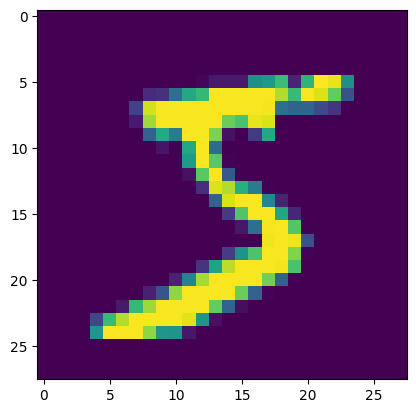

In [188]:
plt.imshow(x_train[0])

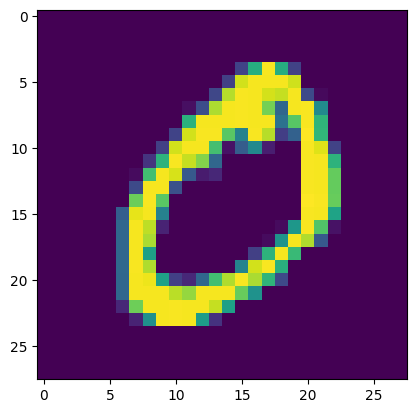

In [189]:
plt.imshow(x_train[1])  

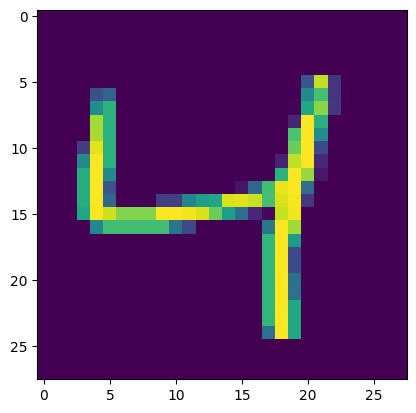

In [190]:
plt.imshow(x_train[2])

In [191]:
y_train[2]

4

In [192]:
num_pixels = x_train.shape[1] * x_train.shape[2] #find size of one-dimensional vector
x_train2 = x_train.reshape(x_train.shape[0], num_pixels).astype('float32') #flatten training images
x_test2 = x_test.reshape(x_test.shape[0], num_pixels).astype('float32') #flatten test images

In [193]:
x_train2[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [194]:
x_train2 = x_train2 / 255 #normalize training data
x_test2 = x_test2 / 255 #normalize test data

In [195]:
y_test[0]

7

In [196]:
y_train2 = to_categorical(y_train) #one-hot encoding
y_test2 = to_categorical(y_test) #one-hot encoding

In [197]:
y_test2[0] #one-hot encoded label

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [198]:
def classification_model():
    # create model
    num_classes = 10    
    model = Sequential()
    model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [199]:
model = classification_model()

In [200]:
model.fit(x_train2, y_train2, validation_data=(x_test2, y_test2), epochs=5, verbose=2)

Epoch 1/5
1875/1875 - 16s - loss: 0.1841 - accuracy: 0.9449 - val_loss: 0.1225 - val_accuracy: 0.9604 - 16s/epoch - 9ms/step
Epoch 2/5
1875/1875 - 14s - loss: 0.0784 - accuracy: 0.9758 - val_loss: 0.0846 - val_accuracy: 0.9744 - 14s/epoch - 7ms/step
Epoch 3/5
1875/1875 - 14s - loss: 0.0524 - accuracy: 0.9831 - val_loss: 0.0719 - val_accuracy: 0.9769 - 14s/epoch - 7ms/step
Epoch 4/5
1875/1875 - 14s - loss: 0.0374 - accuracy: 0.9879 - val_loss: 0.0890 - val_accuracy: 0.9742 - 14s/epoch - 7ms/step
Epoch 5/5
1875/1875 - 14s - loss: 0.0300 - accuracy: 0.9901 - val_loss: 0.0829 - val_accuracy: 0.9769 - 14s/epoch - 7ms/step


In [202]:
scores = model.evaluate(x_test2, y_test2, verbose=0)
scores

[0.08294868469238281, 0.9768999814987183]

In [228]:
import numpy as np
predictions = model.predict(x_test2)
predicted_classes = np.argmax(predictions, axis=1)

313/313 [==============================] - 1s 2ms/step


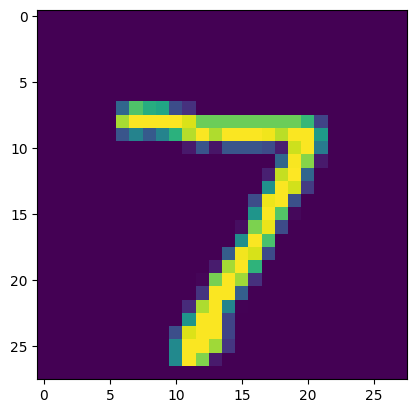

In [229]:
plt.imshow(x_test[0])

In [230]:
predicted_classes[0]

7

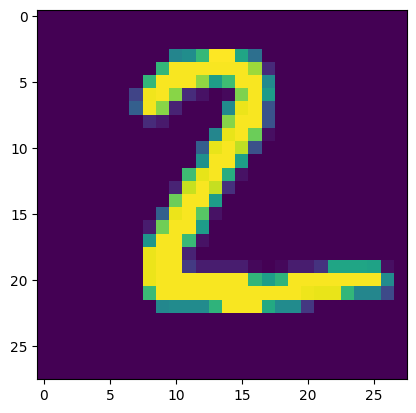

In [231]:
plt.imshow(x_test[1])

In [232]:
predicted_classes[1]

2